<a href="https://colab.research.google.com/github/fd-journey/journey/blob/main/Workshop_Pandas_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Frederic Daoud** frederic.daoud@gmail.com

#NOTE:
Please insert a text cell at the top of the Notebook with your Full Name in Bold and your email that you use for both Journey and Github

Also, add to the title of the notebook, an underscore as well as your name.

Ex. 'Workshop_Pandas_Part_2_Usama'

#Warmup

Run the following lines in the cell below:


```
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

```

**Note:** You can run a cell by pressing 'Shift+Enter'

In [131]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

#Covid-19 Reporting

Run the cell below. We will be working with data on weekly reported Covid-19 cases in Toronto. 

In [132]:
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/e5bf35bc-e681-43da-b2ce-0242d00922ad?format=csv'
covid = pd.read_csv(url)
covid.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,83475,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,83476,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,83477,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,83478,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,83479,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


In the cell below, call the 'Neighbourhood Name' column. 

In [133]:
covid[["Neighbourhood Name"]]

,Neighbourhood Name
0,Willowdale East
1,Willowdale East
2,Parkwoods-Donalda
3,Church-Yonge Corridor
4,Church-Yonge Corridor
...,...
90960,Thistletown-Beaumond Heights
90961,Briar Hill - Belgravia
90962,Mount Dennis
90963,Willowridge-Martingrove-Richview


Call every second row in the data frame. Call every third entry in the "Source of Infection" column. 

In [134]:
covid.iloc[::2,:]

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,83475,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
2,83477,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
4,83479,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No
6,83481,7,Sporadic,80 to 89 Years,Milliken,M1V,Travel,CONFIRMED,2020-02-20,2020-02-28,MALE,RESOLVED,No,No,No,No,No,No
8,83483,9,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-02-29,2020-02-29,MALE,RESOLVED,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90956,174431,93359,Sporadic,30 to 39 Years,York University Heights,M3J,Pending,CONFIRMED,2021-02-07,2021-02-08,MALE,ACTIVE,No,No,No,No,No,No
90958,174433,93361,Sporadic,70 to 79 Years,Bendale,M1P,Pending,CONFIRMED,2021-02-07,2021-02-08,FEMALE,ACTIVE,No,No,No,No,No,No
90960,174435,93363,Sporadic,60 to 69 Years,Thistletown-Beaumond Heights,M9V,Pending,CONFIRMED,2021-02-06,2021-02-08,FEMALE,ACTIVE,No,No,No,No,No,No
90962,174437,93365,Sporadic,20 to 29 Years,Mount Dennis,M6M,Pending,CONFIRMED,2021-02-07,2021-02-08,MALE,ACTIVE,No,No,No,No,No,No


In [135]:
covid[["Source of Infection"]].iloc[::3]

,Source of Infection
0,Travel
3,Travel
6,Travel
9,Travel
12,Travel
...,...
90951,Pending
90954,Pending
90957,Pending
90960,Pending


Call all rows in the dataframe where the infected patient was female. Then call all rows in the dataframe where the patient was male, ever hospitalized and in their 60s.

In [136]:
covid[covid['Client Gender'] == "FEMALE"]

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,83475,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
2,83477,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,83478,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
10,83485,11,Sporadic,70 to 79 Years,Don Valley Village,M2J,Travel,CONFIRMED,2020-02-14,2020-03-01,FEMALE,RESOLVED,No,No,No,No,No,No
16,83491,18,Sporadic,40 to 49 Years,Leaside-Bennington,M4G,Travel,CONFIRMED,2020-03-04,2020-03-07,FEMALE,RESOLVED,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90952,174427,93355,Sporadic,50 to 59 Years,Downsview-Roding-CFB,M3M,Pending,CONFIRMED,2021-02-05,2021-02-08,FEMALE,ACTIVE,No,No,No,No,No,No
90955,174430,93358,Sporadic,19 and younger,Briar Hill - Belgravia,M6B,Pending,CONFIRMED,2021-02-07,2021-02-08,FEMALE,ACTIVE,No,No,No,No,No,No
90958,174433,93361,Sporadic,70 to 79 Years,Bendale,M1P,Pending,CONFIRMED,2021-02-07,2021-02-08,FEMALE,ACTIVE,No,No,No,No,No,No
90960,174435,93363,Sporadic,60 to 69 Years,Thistletown-Beaumond Heights,M9V,Pending,CONFIRMED,2021-02-06,2021-02-08,FEMALE,ACTIVE,No,No,No,No,No,No


In [137]:
covid[(covid['Client Gender'] =="MALE") & (covid["Age Group"] == "60 to 69 Years") & (covid["Ever Hospitalized"] =="Yes")]

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
7,83482,8,Sporadic,60 to 69 Years,Willowdale West,M2N,Travel,CONFIRMED,2020-02-21,2020-03-04,MALE,RESOLVED,No,No,No,Yes,No,No
35,83510,39,Sporadic,60 to 69 Years,Mount Pleasant West,M4S,Travel,CONFIRMED,2020-03-08,2020-03-12,MALE,RESOLVED,No,No,No,Yes,No,No
57,83532,61,Sporadic,60 to 69 Years,Agincourt South-Malvern West,M1S,Travel,CONFIRMED,2020-03-04,2020-03-12,MALE,RESOLVED,No,No,No,Yes,Yes,Yes
100,83575,104,Sporadic,60 to 69 Years,Bay Street Corridor,M5S,Travel,CONFIRMED,2020-03-08,2020-03-15,MALE,RESOLVED,No,No,No,Yes,Yes,No
250,83725,265,Outbreak Associated,60 to 69 Years,Moss Park,M5A,"Outbreaks, Congregate Settings",CONFIRMED,2020-04-23,2020-05-06,MALE,RESOLVED,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89676,173151,92079,Sporadic,60 to 69 Years,High Park North,M6P,Community,CONFIRMED,2021-02-02,2021-02-05,MALE,ACTIVE,No,No,No,Yes,No,No
89888,173363,92291,Outbreak Associated,60 to 69 Years,Waterfront Communities-The Island,M5V,Pending,CONFIRMED,2021-02-04,2021-02-05,MALE,ACTIVE,Yes,No,No,Yes,No,No
89974,173449,92377,Outbreak Associated,60 to 69 Years,Cliffcrest,M1M,Pending,CONFIRMED,2021-02-04,2021-02-05,MALE,ACTIVE,Yes,No,No,Yes,No,No
90066,173541,92469,Sporadic,60 to 69 Years,Westminster-Branson,M2R,Community,CONFIRMED,2021-02-06,2021-02-06,MALE,ACTIVE,Yes,No,No,Yes,No,No


Create 2 new columns in the dataframe, called 'Year' and 'Month' with the year and month values from the reported date columns respectively.

**HINT**
Your code should look like this.

```
Dates = pd.to_datetime(covid['Episode Date'])
covid['Dates'] = Dates
________ = covid['Dates'].dt.month
________ = covid['Dates'].dt.year
```



In [138]:
Dates = pd.to_datetime(covid["Episode Date"])
covid["Dates"] = Dates
covid["Month"] = covid["Dates"].dt.month
covid["Year"] = covid["Dates"].dt.year
covid

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated,Dates,Month,Year
0,83475,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No,2020-01-22,1,2020
1,83476,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No,2020-01-21,1,2020
2,83477,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No,2020-02-05,2,2020
3,83478,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No,2020-02-16,2,2020
4,83479,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No,2020-02-20,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90960,174435,93363,Sporadic,60 to 69 Years,Thistletown-Beaumond Heights,M9V,Pending,CONFIRMED,2021-02-06,2021-02-08,FEMALE,ACTIVE,No,No,No,No,No,No,2021-02-06,2,2021
90961,174436,93364,Sporadic,40 to 49 Years,Briar Hill - Belgravia,M6E,Pending,CONFIRMED,2021-02-07,2021-02-08,MALE,ACTIVE,No,No,No,No,No,No,2021-02-07,2,2021
90962,174437,93365,Sporadic,20 to 29 Years,Mount Dennis,M6M,Pending,CONFIRMED,2021-02-07,2021-02-08,MALE,ACTIVE,No,No,No,No,No,No,2021-02-07,2,2021
90963,174438,93366,Sporadic,40 to 49 Years,Willowridge-Martingrove-Richview,M9R,Pending,CONFIRMED,2021-02-06,2021-02-08,MALE,ACTIVE,No,No,No,No,No,No,2021-02-06,2,2021


In [139]:
Dates[Dates < '2020-02-01']

0       2020-01-22
1       2020-01-21
25435   2020-01-22
26958   2020-01-24
84904   2020-01-22
85492   2020-01-21
87235   2020-01-25
87806   2020-01-28
89278   2020-01-28
Name: Episode Date, dtype: datetime64[ns]

Now use the groupby function to group your entries in the data frame by Year and Month and print out the **mean** number of cases per month as well as the **total count** of cases per month. Make sure to save the number of cases per month as **Counts**.

**HINT**  To get the counts of cases per month, you can use this code. Fill in the blanks.


```
YearMonth = covid.groupby(['____', '____'])
Counts = YearMonth['_id'].agg(['____'])
print (Counts)
```



In [140]:
YearMonth = covid.groupby(["Year","Month"])
Counts = YearMonth["_id"].agg("count")
print(Counts)

print(Counts.mean())






Year  Month
2020  1            9
      2           13
      3         1804
      4         5571
      5         4745
      6         2206
      7          846
      8          864
      9         5174
      10        8776
      11       14860
      12       21869
2021  1        22227
      2         2001
Name: _id, dtype: int64
6497.5


Plot the "Counts" groupby object on a line graph by running the following line below: 

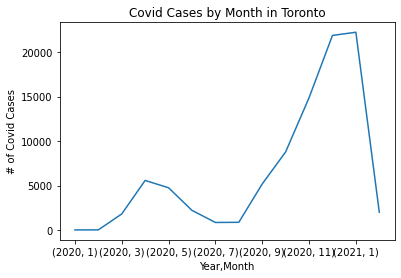

In [141]:
Counts.plot()
plt.ylabel('# of Covid Cases')
plt.title('Covid Cases by Month in Toronto')
plt.show()

Try to create a new groupby object from the original data frame and group this data by "Client Gender". Get a count of the number of patients in each Client Gender category and plot the result on a bar graph. 

**HINT** You can plot the bar graph using the following code.

```
Counts.plot.bar()
plt.ylabel('# of Covid Cases')
plt.title('Covid Cases by Gender in Toronto')
plt.show()
```


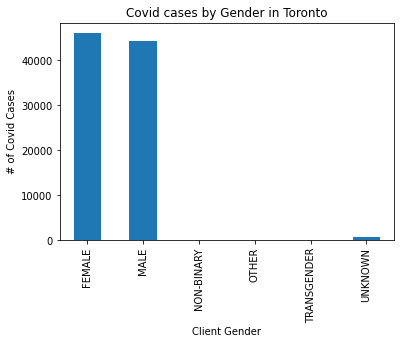

In [142]:
grp = covid.groupby(["Client Gender"])["Client Gender"].agg("count")
grp.plot.bar()
plt.ylabel("# of Covid Cases")
plt.title("Covid cases by Gender in Toronto")
plt.show()


#Interview Questions

##Best Time to Buy and Sell Stock

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.



```
Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.
```



```
Input: prices = [7,6,4,3,1]
Output: 0
Explanation: In this case, no transactions are done and the max profit = 0.
```





In [143]:
prices = [7,6,4,3,20]

def tendies(x):
  profit = 0
  for i in range(len(x)):
    for j in range(i+1,len(x)):
      if x[j] - x[i] > profit:
        profit =  x[j] - x[i]
  return profit

tendies(prices)


17

#Basic Calculator

Given a string s which represents an expression, evaluate this expression and return its value. 

The integer division should truncate toward zero.



```
Input: s = "3+2*2"
Output: 7
```


```
Input: s = " 3/2 "
Output: 1
```




In [144]:
s = "3+(2**3 * 4)"
def cal(x):
  import math
  return math.floor(eval(x))

cal(s)



35

#BONUS

##Gas Station

There are n gas stations along a circular route, where the amount of gas at the ith station is gas[i].

You have a car with an unlimited gas tank and it costs cost[i] of gas to travel from the ith station to its next (i + 1)th station. You begin the journey with an empty tank at one of the gas stations.

Given two integer arrays gas and cost, return the starting gas station's index if you can travel around the circuit once in the clockwise direction, otherwise return -1. If there exists a solution, it is guaranteed to be unique



```
Input: gas = [1,2,3,4,5], cost = [3,4,5,1,2]
Output: 3
Explanation:
Start at station 3 (index 3) and fill up with 4 unit of gas. Your tank = 0 + 4 = 4
Travel to station 4. Your tank = 4 - 1 + 5 = 8
Travel to station 0. Your tank = 8 - 2 + 1 = 7
Travel to station 1. Your tank = 7 - 3 + 2 = 6
Travel to station 2. Your tank = 6 - 4 + 3 = 5
Travel to station 3. The cost is 5. Your gas is just enough to travel back to station 3.
Therefore, return 3 as the starting index.
```



In [3]:
gas = [1,2,3,4,5] 
cost = [3,4,5,1,2]

def Gas(gas,cost):
  origin = -1
  for i in range(len(gas)):
    new_route = gas[i:] + gas[:i]
    new_cost = cost[i:] + cost[:i]
    tank = new_route[0]
    j = 1
    while tank > 0 and j in range(1,len(new_route)) :
        tank -= new_cost[j-1]
        if tank > 0:
            if new_route[j] == new_route[-1]:
                origin = i
                break
            else:
                tank += new_route[j]
                j = j+1 
  if origin != 0:
      return origin
  else:
      return -1

Gas(gas,cost)

3

In [ ]:
gas = [1,2,3,4,5] 
cost = [3,4,5,1,2]

def Gas(gas,cost):
  origin = -1
  for i in range(len(gas)):
    new_route = gas[i:] + gas[:i]
    new_cost = cost[i:] + cost[:i]
    tank = new_route[0]
    j = 1
    while tank > 0 and j in range(1,len(new_route)) :
        tank -= new_cost[j-1]
        if tank > 0:
            if new_route[j] == new_route[-1]:
                origin = i
                break
            else:
                tank += new_route[j]
                j = j+1 
  if origin != 0:
      return origin
  else:
      return -1

Gas(gas,cost)